# Kaggle Customer Satisfaction (Google Drive Mount)_김혜빈
https://www.kaggle.com/c/santander-customer-satisfaction
<br>
<br>
## Data Information
* Kaggle_Customer_Satisfaction.csv (76,020 * 371)
* TARGET : '0' (만족), '1' (불만)
* Metric : 'F1-Score', pos_label = 1(불만)으로 진행

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. Google Drive Mount
* 'Kaggle_Customer_Satisfaction.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'

-rw------- 1 root root 4240457 Mar 15 04:04 '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'


# 2. Data Preprocessing

> ## 1) Unzip 'Kaggle_Customer_Satisfaction.zip'

* Colab 파일시스템에 'Kaggle_Customer_Satisfaction.csv' 파일 생성

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Kaggle_Customer_Satisfaction.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip
  inflating: Kaggle_Customer_Satisfaction.csv  


* Kaggle_Customer_Satisfaction.csv 파일 확인

In [5]:
!ls -l

total 57980
drwx------ 6 root root     4096 Mar 15 04:18 drive
-rw-r--r-- 1 root root 59362806 Dec 11  2019 Kaggle_Customer_Satisfaction.csv
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
import pandas as pd

DF = pd.read_csv('Kaggle_Customer_Satisfaction.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
DF.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


* '0' (만족) TARGET과 '1' (불만) TARGET 개수

In [8]:
DF.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* '0' (만족) TARGET과 '1' (불만) TARGET 비율

In [9]:
(DF.TARGET.value_counts() / DF.shape[0]) * 100
# 만족이 96% 
# 불만족이 4% -> F-1 score 타겟 

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

> ## 3) 'var3' 이상치 전처리

In [10]:
DF.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

* 이상치 '-999999'를 최빈값 '2'로 대체

In [11]:
DF['var3'].replace(-999999, 2, inplace = True)

* 'ID' 컬럼 삭제

In [12]:
DF.drop('ID', axis = 1 , inplace = True)

> ## 4) train_test_split

* X (Input), y (Output) 지정

In [13]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((76020, 369), (76020,))

> ### (1) Without 'stratify'

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [15]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.081858
1     3.918142
Name: TARGET, dtype: float64
Test_Data : 
 0    95.952819
1     4.047181
Name: TARGET, dtype: float64


> ### (2) With 'Stratify'

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [17]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.042395
1     3.957605
Name: TARGET, dtype: float64
Test_Data : 
 0    96.0449
1     3.9551
Name: TARGET, dtype: float64


# 3. EDA

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
corrDF = DF.corr(method = 'pearson')
top_corr = corrDF[abs(corrDF['TARGET'])>= 0.3]
top_corr

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
TARGET,-0.010565,0.101322,-0.000017,0.010353,0.003517,0.003119,-0.000358,0.019221,0.019965,0.003087,0.010082,0.003859,0.029479,0.021486,0.027586,0.03038,0.022172,0.027416,0.000509,0.001608,0.009571,NaN,NaN,-0.032888,-0.135349,-0.002082,-0.001041,0.046665,0.027926,-0.038215,-0.034255,-0.039471,-0.034337,-0.034438,-0.019227,-0.01904,-0.001041,-0.001041,-0.039612,-0.020046,...,-0.015666,-0.018989,-0.004952,-0.003049,-0.003294,-0.002939,-0.017708,-0.011867,-0.021008,-0.021203,-0.023094,-0.013977,-0.025621,-0.024932,-0.011966,-0.007005,-0.012135,-0.01227,-0.001028,NaN,-0.000917,-0.000952,-0.001202,-0.000859,-0.000583,-0.000328,-0.001034,-0.000736,-0.00099,-0.001188,-0.003533,-0.002431,-0.003166,-0.003311,-0.003177,-0.002553,-0.003104,-0.003015,-0.01951,1.0


In [24]:
DF['var15'].describe()
# var15 = 나이

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

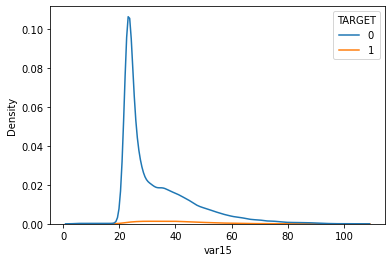

In [28]:
sns.kdeplot(x = 'var15', hue = 'TARGET', data = DF) 
# 만족한 고객의 나이대는 20대 초반이 대부분이다.

# 3. 모델 생성 & 평가

- LogisticRegression
- RandomForestClassifier
- Gradient Boosting Machine(GBM) Classifier

> ## 1) LogisticRegression

In [33]:
%%time
c = [0.3, 0.5, 0.7, 0.9]

for j in range(len(c)):
  C = c[j]

  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import f1_score
  from sklearn.metrics import confusion_matrix
  LR = LogisticRegression(C = C, 
                        penalty = 'l2',
                        n_jobs = -1)
  LR.fit(X_train, y_train)
  LR_f1score = f1_score(y_test, LR.predict(X_test), pos_label = 1)
  LR_con = confusion_matrix(y_test, LR.predict(X_test), labels = [1, 0]) 
  print("Parameter : {} , F-1 Score : {}".format(C, LR_f1score))
  print('\n')
  print('LR_confusion_matrix : ', '\n', LR_con)
  print('\n\n')
  # 왜 전부 0.0이 나온 건지..

Parameter : 0.3 , F-1 Score : 0.0


LR_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : 0.5 , F-1 Score : 0.0


LR_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : 0.7 , F-1 Score : 0.0


LR_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : 0.9 , F-1 Score : 0.0


LR_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



CPU times: user 1.25 s, sys: 804 ms, total: 2.05 s
Wall time: 3min 5s


In [61]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression(C = 0.2, 
                        penalty = 'l2',
                        n_jobs = -1)
LR.fit(X_train, y_train)
LR_f1score = f1_score(y_test, LR.predict(X_test), pos_label = 1)
print(LR_f1score)
LR_acc = accuracy_score(y_test, LR.predict(X_test))
print(LR_acc)
# 파라미터들을 하나씩 바꿔봤지만, f1_score가 그대로다. 

0.0
0.9604490046478997


> ## 2) RandomForestClassifier

In [41]:
%%time
est = [1000, 2000]
fea = [9, 10, 11]
dep = [3, 4]

for i in est:
  for j in fea:
    for k in dep:
      parameter = (i, j, k)
      from sklearn.ensemble import RandomForestClassifier
      from sklearn.metrics import f1_score
      RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = i,
                            max_features = j,
                            max_depth = k,
                            random_state = 2045,
                            n_jobs = -1)
      RF.fit(X_train, y_train)
      RF_f1score = f1_score(y_test, RF.predict(X_test), pos_label = 1)
      RF_con = confusion_matrix(y_test, LR.predict(X_test), labels = [1, 0])
      print("Parameter : {} , F1_score : {}".format(parameter, RF_f1score))
      print('\n\n')
      print('RF_confusion_matrix : ', '\n', RF_con)
      print('\n\n')

Parameter : (1000, 9, 3) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (1000, 9, 4) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (1000, 10, 3) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (1000, 10, 4) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (1000, 11, 3) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (1000, 11, 4) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (2000, 9, 3) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (2000, 9, 4) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (2000, 10, 3) , F1_score : 0.0



RF_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (2000, 10, 4) , F1_score : 0.0



RF_confusion_

In [60]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 1000,
                            max_features = 20,
                            max_depth = 5,
                            random_state = 2045,
                            n_jobs = -1)
RF.fit(X_train, y_train)
RF_f1score = f1_score(y_test, LR.predict(X_test), pos_label = 1)
print(RF_f1score)
RF_acc = accuracy_score(y_test, RF.predict(X_test))
print(RF_acc)
# 파라미터들을 하나씩 바꿔봤지만, f1_score가 그대로다. 

0.0
0.9604490046478997
CPU times: user 1min 22s, sys: 673 ms, total: 1min 23s
Wall time: 43 s


> ## 3) Gradient Boosting Machine(GBM) Classifier

In [49]:
%%time
est = [100, 200]
lea = [0.01, 0.1, 0.3]
fea = [5, 6]
dep = [3, 4]

for i in est:
  for j in lea:
    for k in fea:
      for l in dep:
        parameter = (i, j, k, l)
        from sklearn.ensemble import GradientBoostingClassifier
        GBC = GradientBoostingClassifier(loss = 'deviance',
                            n_estimators = i,
                            learning_rate = j,
                            max_features = k,
                            max_depth = l)
        GBC.fit(X_train, y_train)
        GBC_f1score = f1_score(y_test, RF.predict(X_test), pos_label = 1)
        GBC_con = confusion_matrix(y_test, RF.predict(X_test), labels = [1, 0])
        print("Parameter : {} , F1_score : {}".format(parameter, GBC_f1score))
        print('\n')
        print('GBC_confusion_matrix : ', '\n', GBC_con)
        print('\n\n')

Parameter : (100, 0.01, 5, 3) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.01, 5, 4) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.01, 6, 3) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.01, 6, 4) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.1, 5, 3) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.1, 5, 4) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.1, 6, 3) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.1, 6, 4) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.3, 5, 3) , F1_score : 0.0


GBC_confusion_matrix :  
 [[    0   902]
 [    0 21904]]



Parameter : (100, 0.3, 5

In [56]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 1000,
                                 learning_rate = 0.01,
                                 max_features = 30,
                                 max_depth = 7)
GBC.fit(X_train, y_train)
GBC_f1score = f1_score(y_test, GBC.predict(X_test), pos_label = 1)
print(GBC_f1score)
GBC_acc = accuracy_score(y_test, GBC.predict(X_test))
print(GBC_acc)
# 한번에 돌리면 시간이 오래 걸려서 파라미터들을 하나씩 바꿔봤지만, f1_score가 좀처럼 높아지지 않는다. 

0.006593406593406593
0.9603613084276068
CPU times: user 2min 5s, sys: 185 ms, total: 2min 5s
Wall time: 2min 5s


# 4. 결론

In [63]:
df_result = pd.DataFrame({"Model" : ['LR', 'RF', 'GBC'],
                          "F1_score" : [LR_f1score, RF_f1score, GBC_f1score]})
                          
df_result.sort_values(by=['F1_score'], axis=0, ascending = False)
# GBC 모델에서 가장 F1_score가 크다.

,Model,F1_score
2,GBC,0.006593
0,LR,0.000000
1,RF,0.000000


# 
# 
# 
# The End
# 
# 
# 